In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *

from qiskit_aer import Aer

We can simulate without using `qiskit` just by using python packages. There we don't need to worry about the initial state $\rho$. We assume it is given to us, in classical matrix form. So the expectation values can be calculated just by calculating traces.

# Notes
Let, $\rho = \sum_{i=1}^d c_i X_i$

It is assumed that $X_i$'s are independent and orthonormal i.e $Tr(X_i^\dagger X_j) = \delta_{ij}$.

Then, $Tr(\rho X_i) = c_i$

Our initial state is $\rho = \rho_1 \oplus \rho_2 \oplus \rho_3$, where,

$$\rho_1 = \frac{1}{3}
\begin{bmatrix}
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1
\end{bmatrix}
            \quad 
\rho_2 = \frac{1}{3}
\begin{bmatrix}
    1 & 1 & 1 \\
    1 & 1 & -1 \\
    1 & -1 & 1
\end{bmatrix} \quad
\rho_3 = \frac{1}{2}
\begin{bmatrix}
    1 & 0 \\ 0 & 1
\end{bmatrix}$$


We want to find `Pauli Decomposition` of $\rho$ i.e. to find $c_i$'s where $X_i$'s are Pauli matrices/tensor products of Pauli matrices.

# Reference from [here](https://docs.quantum.ibm.com/build/specify-observables-pauli)

In [2]:
#TODO: initialize a mixed state
from scipy.linalg import block_diag
from qiskit.quantum_info import DensityMatrix


# specify the quantum state in an array
rho_1 = (1/3)*np.array([[1,1,1],
                        [1,1,1],
                        [1,1,1]])

rho_2 = (1/3)*np.array([[1,1,1],
                        [1,1,-1],
                        [1,-1,1]])

rho_3 = (1/2)*np.array([[1,0],
                        [0,1]])

# direct sum of rho_1, rho_2, and rho_3

rho =  block_diag(rho_1, rho_2, rho_3)
# this is our initial mixed state

#convert rho into density matrix
rho = DensityMatrix(rho)

In [3]:
DensityMatrix.is_valid(rho)

False

In [4]:
# Pauli decomposition
from qiskit.quantum_info import SparsePauliOp

pauli_decomposition = SparsePauliOp.from_operator(rho)

In [5]:
# pauli decomposition
paulis = pauli_decomposition.to_list()

paulis

[('III', (0.375+0j)),
 ('IXI', (0.08333333333333333+0j)),
 ('IXX', (0.08333333333333333+0j)),
 ('IXZ', (0.08333333333333333+0j)),
 ('IYY', (0.08333333333333333-0j)),
 ('IZI', (-0.04166666666666666+0j)),
 ('XXI', (0.08333333333333333+0j)),
 ('XXX', (0.08333333333333333+0j)),
 ('XXZ', (-0.08333333333333333+0j)),
 ('XYY', (-0.08333333333333333+0j)),
 ('YXY', (0.08333333333333333-0j)),
 ('YYI', (0.08333333333333333-0j)),
 ('YYX', (0.08333333333333333-0j)),
 ('YYZ', (-0.08333333333333333+0j)),
 ('ZII', (-0.04166666666666667+0j)),
 ('ZIX', (0.16666666666666666+0j)),
 ('ZXI', (0.08333333333333333+0j)),
 ('ZXX', (0.08333333333333333+0j)),
 ('ZXZ', (0.08333333333333333+0j)),
 ('ZYY', (0.08333333333333333-0j)),
 ('ZZI', (0.04166666666666667+0j)),
 ('ZZX', (0.16666666666666666+0j))]

## Here though we have decomposed our state $\rho$ into Pauli matrices, we don't know how to initialize our circuit in this particular state 🥲

# In the following, we will be using the library `qutip`

In [7]:
import numpy as np
import sympy as sp
from qutip import *
from scipy.linalg import block_diag

In [2]:
# check if a given matrix is a density matrix or not
def is_density_matrix(matrix):
    # Check if the matrix is square
    if matrix.shape[0] != matrix.shape[1]:
        print("Matrix is not square")
        return False
    
    # Check if the matrix is Hermitian
    if not np.allclose(matrix, matrix.conj().T):
        print("Matrix is not Hermitian")
        return False
    
    # Check if the trace of the matrix is 1
    if not np.isclose(np.trace(matrix), 1):
        print("Trace of the matrix is not 1")
        return False
    
    # Check if all eigenvalues are non-negative
    eigenvalues = np.linalg.eig(matrix)[0]
    if not np.all(eigenvalues >= -1e-10):
        print("Not all eigenvalues are non-negative")
        return False
    
    return True

In [3]:
# generating density matrix using qutip
dm = rand_dm(5)
# print(dm)
is_density_matrix(dm.full())

True

$\rho = \frac{1}{3} \rho_1 \oplus \rho_2 \oplus \rho_3$, where,

$$\rho_1 = \frac{1}{3}
\begin{bmatrix}
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1
\end{bmatrix}
            \quad 
\rho_2 = \frac{1}{3}
\begin{bmatrix}
    1 & 1 & -1 \\
    1 & 1 & -1 \\
    -1 & -1 & 1
\end{bmatrix} \quad
\rho_3 = \frac{1}{2}
\begin{bmatrix}
    1 & 0 \\ 0 & 1
\end{bmatrix}$$


We changed the definition of $\rho_2$.

Old:
$$\rho_2 = \begin{bmatrix}
    1 & 1 & 1 \\
    1 & 1 & -1 \\
    1 & -1 & 1
\end{bmatrix}$$

New:
$$
\rho_2 = \begin{bmatrix}
    1 & 1 & -1 \\
    1 & 1 & -1 \\
    -1 & -1 & 1
\end{bmatrix}
$$

In [8]:
# generating density matrix rho = (1/3) rho_1 ⊕ (1/3) rho_2 ⊕ (1/3) rho_3
rho_1 = np.array([[1, 1, 1],
                [1, 1, 1],
                [1, 1, 1]]) / 3

rho_2 = np.array([[1, 1, -1],
                [1, 1, -1],
                [-1, -1, 1]]) / 3

rho_3 = np.array([[1, 0],
                [0, 1]]) / 2

# direct sum of rho_1, rho_2, and rho_3
rho = np.array(block_diag(rho_1, rho_2, rho_3))/3       # it is an numpy array

# convert rho into a qutip object
rho = Qobj(rho)

rho

Quantum object: dims=[[8], [8]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.11111111  0.11111111  0.11111111  0.          0.          0.
   0.          0.        ]
 [ 0.11111111  0.11111111  0.11111111  0.          0.          0.
   0.          0.        ]
 [ 0.11111111  0.11111111  0.11111111  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.11111111  0.11111111 -0.11111111
   0.          0.        ]
 [ 0.          0.          0.          0.11111111  0.11111111 -0.11111111
   0.          0.        ]
 [ 0.          0.          0.         -0.11111111 -0.11111111  0.11111111
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.16666667  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.16666667]]

# Hamiltonian
$H^{(8)} = \mathbb I \otimes \mathbb I \otimes H' + \mathbb I \otimes H' \otimes \mathbb I + \mathbb I \otimes\mathbb I \otimes H'$,

where $H' = \frac{1}{2} (\mathbb I + Z)$

In [9]:
# h = (I + Z)/2
h = np.array([[1, 0],
              [0, 0]])
I = np.array([[1, 0],
              [0, 1]])

# H = h ⊗ I ⊗ I + I ⊗ h ⊗ I + I ⊗ I ⊗ h
H = np.kron(np.kron(h, I), I) + np.kron(np.kron(I, h), I) + np.kron(np.kron(I, I), h)
H = Qobj(H)
H

Quantum object: dims=[[8], [8]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

# Measurement

In [105]:
from qutip.measurement import measure, measurement_statistics
np.random.seed(12345)
# H1 = np.diag([1,2,3,4,5,6,7,8])
# H1 = Qobj(H1)

# measure(rho, H1)

In [12]:
# up = basis(2, 0)
# down = basis(2, 1)

# spin_z = sigmaz()
# spin_x = sigmax()

# from qutip.measurement import measure, measurement_statistics

# measure(up, spin_z) == (1.0, up)

# measure(down, spin_z) == (-1.0, down)

First let us set our Projective measurement operators

In [106]:
# kets in 4-dim Hilbert space
ket00 = basis(4, 0)
ket01 = basis(4, 1)
ket10 = basis(4, 2)
ket11 = basis(4, 3)

# projective operators
Z00, Z01, Z10, Z11 = ket2dm(ket00), ket2dm(ket01), ket2dm(ket10), ket2dm(ket11)


# The following is the rank-2 projectors for our measurement

P0, P1, P2, P3 = tensor(Z00, identity(2)), tensor(Z01, identity(2)), tensor(Z10, identity(2)), tensor(Z11, identity(2))


''' 
    The following lines of codes are required for dimension matching of density_matrix
    and projectors. It is a contraint of Qobj class in qutip
'''

P0, P1, P2, P3 = P0.full(), P1.full(), P2.full(), P3.full()
P0, P1, P2, P3 = Qobj(P0), Qobj(P1), Qobj(P2), Qobj(P3)

In [19]:
# outcome, post_measure_state = measure(rho, projectors)
# print(outcome)
# print(post_measure_state)

In [112]:
# defining projective operators
projectors = [P0, P1, P2, P3]

''' 
    Results is a dictionary that intializes the keys with number of corresponding outcomes.
    After repeated measurements, the counter for each outcome is incremented.
'''
results = {0.0:0, 1.0:0, 2.0:0, 3.0:0}
for i in range(1000):
    value, new_state = measure(rho, projectors)
    results[round(value)] += 1
    
print(results)
results.keys()

{0.0: 236, 1.0: 206, 2.0: 224, 3.0: 334}


dict_keys([0.0, 1.0, 2.0, 3.0])

In [115]:
# probability estimation in stage 1

def algorithm_stage1(rho, projectors, num_shots):
    outcomes = {0.0:0, 1.0:0, 2.0:0, 3.0:0}
    for i in range(num_shots):
        value, _ = measure(rho, projectors)
        outcomes[round(value)] += 1
    # divide by the number of shots to get the probability
    for key in outcomes.keys():
        outcomes[key] /= num_shots
    return outcomes

In [121]:
algorithm_stage1(rho, projectors, 1000)

{0.0: 0.238, 1.0: 0.204, 2.0: 0.241, 3.0: 0.317}

In [55]:
# create a histogram for the probabilities
def plot_histogram(probabilities):
    plt.bar(probabilities.keys(), probabilities.values())
    plt.xlabel('Outcomes')
    plt.ylabel('Probabilities')
    plt.show()

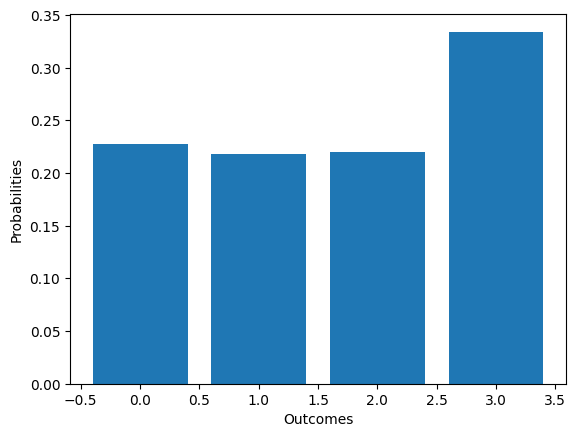

In [126]:
plot_histogram(algorithm_stage1(rho, projectors, 10000))

In [16]:
# Measurement outcome of hamiltonian for each projective measurement outcome
_energies = []

for P in projectors:
    energy = np.trace( (P * H * P.dag()).full() )
    _energies.append(energy.real)

print(_energies)

standard_outcome_to_energy_outcomes = {0.0:5.0, 1.0:3.0, 2.0:3.0, 3.0:1.0}
standard_outcome_to_energy_outcomes[0.0]


[5.0, 3.0, 3.0, 1.0]


5.0

In [15]:
rho

Quantum object: dims=[[8], [8]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.11111111  0.11111111  0.11111111  0.          0.          0.
   0.          0.        ]
 [ 0.11111111  0.11111111  0.11111111  0.          0.          0.
   0.          0.        ]
 [ 0.11111111  0.11111111  0.11111111  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.11111111  0.11111111 -0.11111111
   0.          0.        ]
 [ 0.          0.          0.          0.11111111  0.11111111 -0.11111111
   0.          0.        ]
 [ 0.          0.          0.         -0.11111111 -0.11111111  0.11111111
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.16666667  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.16666667]]

Pauli Group

In [13]:
# Pauli matrices
I, X, Y, Z = qeye(2), sigmax(), sigmay(), sigmaz()

# Pauli group
pauli_group = []

for op in [I, X, Y, Z]:
    pauli_group.append(op)
    pauli_group.append(-1*op)
    pauli_group.append(1j*op)
    pauli_group.append(-1j*op)

# Algorithm for work extraction

The Algorithm

In [14]:
# stage 2 of algorithm
def algorithm_stage2(density_matrix, hamiltonian, total_iter):
    #TODO: change the outcome of the measurement to corresponding energy outcome
    energy_outcomes = []
    for iteration in range(total_iter):
        if np.random.choice([0, 1]) == 0:
            outcome, _ = measure(density_matrix, projectors)
            energy_outcomes.append(standard_outcome_to_energy_outcomes[outcome])
            
        else:
            # measure density matrix 
            _, post_measure_state = measure(density_matrix, projectors)
            u_random = np.random.choice(pauli_group)

            # I_M ⊗ U_r         refer to overleaf document for more details
            u = tensor(qeye(4), u_random)  # currently hard coded. We will change 4 to general dimension
            u = Qobj(u.full()) # converting to np.array and again back to Qobj to match the dimension
            density_matrix = u * post_measure_state * u.dag()
           
            U_gl = qeye(8)      # global unitary
            density_matrix = U_gl * density_matrix * U_gl.dag()

            # measure -H
            outcome, _ = measure(density_matrix, projectors)
            energy_outcomes.append(-1 * standard_outcome_to_energy_outcomes[outcome])
    
    return np.array(energy_outcomes)

In [23]:
algorithm_stage2(rho, H, 100000)

extractable_work = np.mean(algorithm_stage2(rho, H, 1000))


for total_iter in [10, 100, 1000, 10000, 100000, 1000000]:
    extractable_work = np.mean(algorithm_stage2(rho, H, total_iter))
    print(f"Total iterations: {total_iter}, Extractable work: {extractable_work}")

Total iterations: 10, Extractable work: -0.2
Total iterations: 100, Extractable work: -0.48
Total iterations: 1000, Extractable work: -0.012
Total iterations: 10000, Extractable work: -0.0072
Total iterations: 100000, Extractable work: -0.00786
Total iterations: 1000000, Extractable work: 0.001214


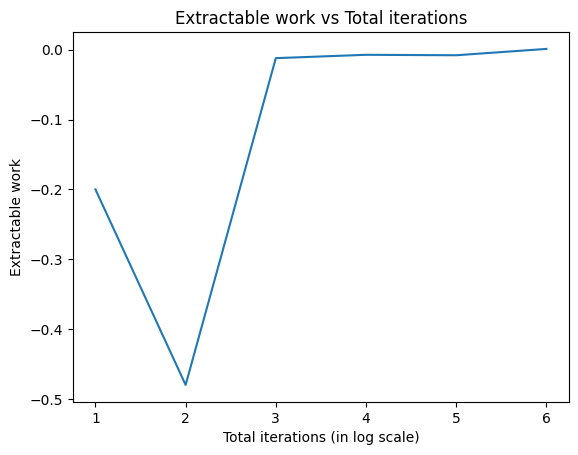

In [43]:
# plot the above outcomes
import matplotlib.pyplot as plt

extractable_works = [-0.2, -0.48, -0.012, -0.0072, -0.00786, 0.001214]
total_iters = [10, 100, 1000, 10000, 100000, 1000000]

#plot in log scale
plt.plot(np.log10(total_iters), extractable_works)
plt.xlabel("Total iterations (in log scale)")
plt.ylabel("Extractable work")
plt.title("Extractable work vs Total iterations")
plt.show()


In [19]:
extractable_work = np.mean(algorithm_stage2(rho, H, 1000000))
print(f"Total iterations: {1000000}, Extractable work: {extractable_work}")

Total iterations: 1000000, Extractable work: -0.001656


In [45]:
print(np.mean(algorithm_stage2(rho, H, 10000)))

0.0056
